# Document Similarity

# Step one : Import neccessry of data

In [15]:
import string
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step two : Read dataset

In [16]:
#read dataset

with open('data/Mini data.txt', 'r', encoding='utf-8') as file:
    text_data = file.read()
    

In [17]:
#head()
text_data

'"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."\n\n    \n"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee

In [18]:
# Splitting the text data into paragraphs for easier handling
paragraphs = text_data.split('\n\n')

# Clean the paragraphs by stripping leading and trailing whitespaces and removing redundant newlines
cleaned_paragraphs = [re.sub(r'\s+', ' ', para.strip()) for para in paragraphs if para.strip() != '']

cleaned_paragraphs


['"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."',
 '"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee Baa

In [19]:
class TextData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.content = None
        self.load_data()

    def load_data(self):
        """Loads text data from a file."""
        with open(self.file_path, 'r', encoding='utf-8') as file:
            self.content = file.read()

    def display_content(self, num_paragraphs=None):
        """Prints the content of the text file."""
        if num_paragraphs is None:
            print(self.content)
        else:
            paragraphs = self.content.split('\n\n')[:num_paragraphs]
            for paragraph in paragraphs:
                print(paragraph)

# Create an instance of the TextData class using the actual file path
text_file = TextData('data/Mini data.txt')

# Now, let's display the content using the method from our class
text_file.display_content()



"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."

    
"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee Baa

In [20]:
#.head(2)
text_file.display_content(2)

"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."
    
"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee Baar

-----------------------------------------------------

# Step three : sanity check of data

In [21]:
class TextData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.content = None
        self.paragraphs = []
        self.load_data()

    def load_data(self):
        """Loads text data from a file and splits into paragraphs."""
        with open(self.file_path, 'r', encoding='utf-8') as file:
            self.content = file.read()
            self.paragraphs = self.content.split('\n\n')  # Split content into paragraphs

    def display_content(self, n=None):
        """Prints the content of the text file. If n is specified, prints the first n paragraphs with spacing between them."""
        if n is None:
            print(self.content)
        else:
            print("\n\n".join(paragraph.strip() for paragraph in self.paragraphs[:n]))

    def sanity_check(self):
        """Performs comprehensive sanity checks on the loaded text data."""
        print("Total number of paragraphs:", len(self.paragraphs))
        print("Total number of characters:", len(self.content))
        print("Average length of paragraphs:", sum(len(p) for p in self.paragraphs) / len(self.paragraphs))

        # Detect any non-printable characters
        non_printable_chars = [char for char in self.content if not char.isprintable() and char not in '\n\t']
        if non_printable_chars:
            print("Non-printable characters found in the text:", set(non_printable_chars))
        else:
            print("No non-printable characters found in the text.")

        # Checking for empty paragraphs
        empty_paragraphs = sum(1 for p in self.paragraphs if not p.strip())
        print("Number of empty paragraphs:", empty_paragraphs)

        # Percentage of the text that is whitespace
        whitespace_percentage = float(sum(1 for char in self.content if char.isspace())) / len(self.content) * 100
        print("Percentage of whitespace in text:", round(whitespace_percentage, 2), '%')

        # Checking for duplicate paragraphs
        from collections import Counter
        paragraph_counts = Counter(self.paragraphs)
        print("Number of duplicate paragraphs:", len(self.paragraphs) - len(set(self.paragraphs)))

        # Detailed counts of repeated paragraphs
        for paragraph, count in paragraph_counts.items():
            if count > 1:
                print(f'Paragraph repeated {count} times:\n{paragraph}\n' + "****" * 10)



# Perform sanity check
# Create an instance of TextData
text_file = TextData("data/Mini data.txt")
text_file.sanity_check()

Total number of paragraphs: 3
Total number of characters: 1819
Average length of paragraphs: 605.0
Non-printable characters found in the text: {'\xa0'}
Number of empty paragraphs: 0
Percentage of whitespace in text: 13.69 %
Number of duplicate paragraphs: 0


----------------------------------------------------

## Step four : Tokenization

### Tokenization of words

In [22]:
# Load and display the content of the text file to understand its structure before tokenizing the words
file_path = 'data/Mini data.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

text_data 

'"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."\n\n    \n"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee

In [76]:
import nltk
from nltk.tokenize import word_tokenize

Ensure that the necessary NLTK tokenizers are available
nltk.download('punkt')

# Tokenize the text into words
tokens = word_tokenize(text_data)
tokens[:50]  # Display the first 50 tokens to check the tokenization output

SyntaxError: invalid syntax (2802759867.py, line 4)

In [27]:
import re

# Simple tokenization using regular expressions t split words at spaces and punctuation
simple_tokens = re.findall(r'\b\w+\b', text_data)
simple_tokens[:50]  # Display the first 50 tokens

['Safaaradda',
 'Mareykanka',
 'ayaa',
 'mar',
 'kale',
 'ugu',
 'baaqday',
 'Madaxda',
 'Soomaalida',
 'inay',
 'ka',
 'dhabeeyaan',
 'balanqaadkooda',
 'ahaa',
 'in',
 'doorashada',
 'Baarlamaanka',
 'lagu',
 'soo',
 'gabagabeeyo',
 '25',
 'ka',
 'bishan',
 'Febraayo',
 'Dowladda',
 'Mareykanka',
 'waxay',
 'la',
 'xisaabtami',
 'doontaa',
 'ciddii',
 'carqaladeysa',
 'hannaanka',
 'doorashada',
 'ayaa',
 'lagu',
 'yiri',
 'Qoraalka',
 'Twitterka',
 'ee',
 'Safaaradda',
 'Mareykank',
 'ee',
 'Muqdisho',
 'Warkaan',
 'kasoo',
 'baxay',
 'Dowladda',
 'Mareykanka',
 'ayaa']

--------------------------------------------------------

### Tokenization of sentences

In [28]:
import re

# Function to tokenize text into sentences using regular expressions to capture typical end of sentence punctuation
def tokenize_sentences(text):
    # Regular expression pattern for sentence splitting
    # This considers '.', '!', '?', and line breaks as possible sentence terminators.
    sentence_pattern = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!|\n)\s'
    sentences = re.split(sentence_pattern, text)
    return [sentence.strip() for sentence in sentences if sentence.strip() != '']

# Tokenize the dataset content into sentences
tokenized_sentences = tokenize_sentences(text_data)
tokenized_sentences[:10]  # Display the first 10 tokenized sentences for review

['"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."',
 '"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee Baa

---------------------------------------

## Step five : Stop words Removals

In [29]:
# Correctly using the stop words provided in the uploaded file content
stop_words = """
aad, aad u, aan, aanu, adiga, adigoo, ah, ahaa, ahaayeen, ahay, ahayn, albaabkii, ama, anigoo, annaga, atabo, ay, ayaa, ayaan, ayaanu, ayada, ayee, ayuu, baa, baan, balse, been, buu, dadka, demin, dhamaan, dhan, dheeraad, dheeraad ah, dhowr, dibadda, doonaa, ee, goorta, gudaha, hadana, haddii, hadii, hal mar, halkaas, halkan, haysta, haystaa, haysto, hoos, ilaa, in, inay, inta, inta badan, inuu, isaga, isagoo, isku, isku mid, iyada, iyadoo, iyaga, iyagoo, iyo, jiray, jirtay, ka, ka dhan ah, ka dib, ka hor, kaa, kaaga, kaas, kahor, kale, kaliya, kama, kan, karo, kasoo, kastaa, kay, kayga, keeda, keedu, keeni, keliya, keyrkayaga, kheyrkayaga, kiisa, kor, ku, ku saabsan, kula, kuu, kuwaan, kuwaas, la, laakiin, labada, lagu, lahaa, lakin, lama, leh, lkn, ma aha, mana, mar, mar kale, marka, markaa, markii, maxaa, maxaa yeelay, maxay, maya, meesha, mid kasta, muuqda, na, naftaada, naftayda, nafteenna, naftiina, naftiisa, naftooda, noocaas, noqo, oo, qaar, samaynaya, sameeyaa, sameeyey, sameeyo, si, sida, sidaa, sidaas, sidee, sidoo kale, sii, soo, taa, taas, u, u dhaxeeya, uga, ugu, uu, waa, wax, waxa, waxa,aniga, waxaa, waxay, waxuu, weli, wuxuu, yaan, yahay, yeelan, yihiin,
"""

# Splitting the stop words string into a set for efficient lookup
stop_words_set = set(stop_words.replace("\n", " ").split(", "))

# Texts to clean using the stop words
texts = [
    "Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo. Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho. Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliyo doorashada Xildhibaannada Golaha Shacabka.",
    "Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo. Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee Baarlamaanka 1aad.",
    "Maleeshiyaad hubeysan ayaa laba qof oo Shacab ahaa waxaa ay ku dileen Deegaanka Saaxo ee Gobolka Mudug, iyaga oo dilka kadib goobta ka baxsaday. Maleeshiyaadka dilka geystay ayaà ka yimid dhinaca Deegaanka Galiinsoor ee Gobolka Galguduud sida wararku sheegayaan, wuxuuna dilla salka ku hayaa aanooyin qabiil."
]

# Removing stop words from the texts
cleaned_texts = []
for text in texts:
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words_set]
    cleaned_texts.append(" ".join(filtered_words))

cleaned_texts

['Safaaradda Mareykanka baaqday Madaxda Soomaalida dhabeeyaan balanqaadkooda doorashada Baarlamaanka gabagabeeyo 25-ka bishan Febraayo. Dowladda Mareykanka xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada yiri Qoraalka Twitterka Safaaradda Mareykank Muqdisho. Warkaan baxay Dowladda Mareykanka kusoo beegmaya xilli Beesha Caalamka Maanta baaqday dardargeliyo doorashada Xildhibaannada Golaha Shacabka.',
 'Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, Xarunta Madaxtooyada qaabilay xildhibaanada Cusub maanta doortay Magaalada Kismaayo. Xildhibaanadan kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, Cadar xareed jibriil kamid noqonaya Xildhibaanada golaha shacabka Baarlamaanka 1aad.',
 'Maleeshiyaad hubeysan laba qof Shacab dileen Deegaanka Saaxo Gobolka Mudug, dilka kadib goobta baxsaday. Maleeshiyaadka dilka geystay ayaà yimid dhinaca Deegaanka Galiinsoor Gobolka Galguduud wararku sheegayaan, wuxuuna dilla salka hayaa aanooyin qabiil.']

--------------------------------------------------------

## Step five : Punctuation Removal

In [30]:
# Load the data from the uploaded file
file_path = 'data/Mini data.txt'

# Read the content of the file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Function to remove punctuation from the text
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Remove punctuation from the dataset
cleaned_data = remove_punctuation(data)

# Split the cleaned data into paragraphs (assuming each paragraph is separated by two newlines)
paragraphs = cleaned_data.split('\n\n')

# Display the first two paragraphs, each starting on a new line
for paragraph in paragraphs[:2]:
    print(paragraph)


Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25ka bishan Febraayo“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee MuqdishoWarkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha SjacabkaHeshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo gebagabeeyo doorashada Golaha Shacabka balse kala bar kaliya la doortay
    
Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada KismaayoXildhibaanadan oo kala ah Nasro Mahdi Caraale Saadaq Cabdullahi Cabdi iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada golaha shacabka ee Baarlamaanka 1aadMa

----------------------------------------------------------

## Convert into lowercase

In [31]:
# Reading the uploaded text file and converting the content to lowercase using Python.

file_path = "data/Mini data.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Convert text to lowercase
lowercase_text = text.lower()
lowercase_text


'"safaaradda mareykanka ayaa mar kale ugu baaqday madaxda soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada baarlamaanka lagu soo gabagabeeyo 25-ka bishan febraayo.“dowladda mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri qoraalka twitterka ee safaaradda mareykank ee muqdisho.warkaan kasoo baxay dowladda mareykanka ayaa kusoo beegmaya xilli beesha caalamka maanta ay ku baaqday in la dardargeliye doorashada xildhibaannada golaha sjacabka.heshiiskii doorashada ay muqdisho ku gaareen golaha wadatashiga ayaa dhigayay in 25 bishaan la soo geba-gabeeyo doorashada golaha shacabka, balse kala bar kaliya la doortay."\n\n    \n"madaxweynaha dowlad goboleedka jubbaland axmed maxamed islaam, ayaa xarunta madaxtooyada ku qaabilay xildhibaanada cusub ee maanta lagu doortay magaalada kismaayo.xildhibaanadan oo kala ah, nasro mahdi caraale, saadaq cabdullahi cabdi, iyo cadar xareed jibriil ayaa kamid noqonaya xildhibaanada golaha shacabka ee

In [32]:
# Removing occurrences of "\n\n" from the lowercase text and displaying the updated text.
cleaned_text = lowercase_text.replace("\n\n", " ")
cleaned_text


'"safaaradda mareykanka ayaa mar kale ugu baaqday madaxda soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada baarlamaanka lagu soo gabagabeeyo 25-ka bishan febraayo.“dowladda mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri qoraalka twitterka ee safaaradda mareykank ee muqdisho.warkaan kasoo baxay dowladda mareykanka ayaa kusoo beegmaya xilli beesha caalamka maanta ay ku baaqday in la dardargeliye doorashada xildhibaannada golaha sjacabka.heshiiskii doorashada ay muqdisho ku gaareen golaha wadatashiga ayaa dhigayay in 25 bishaan la soo geba-gabeeyo doorashada golaha shacabka, balse kala bar kaliya la doortay."     \n"madaxweynaha dowlad goboleedka jubbaland axmed maxamed islaam, ayaa xarunta madaxtooyada ku qaabilay xildhibaanada cusub ee maanta lagu doortay magaalada kismaayo.xildhibaanadan oo kala ah, nasro mahdi caraale, saadaq cabdullahi cabdi, iyo cadar xareed jibriil ayaa kamid noqonaya xildhibaanada golaha shacabka ee ba

-----------

## Step six : Word cloud

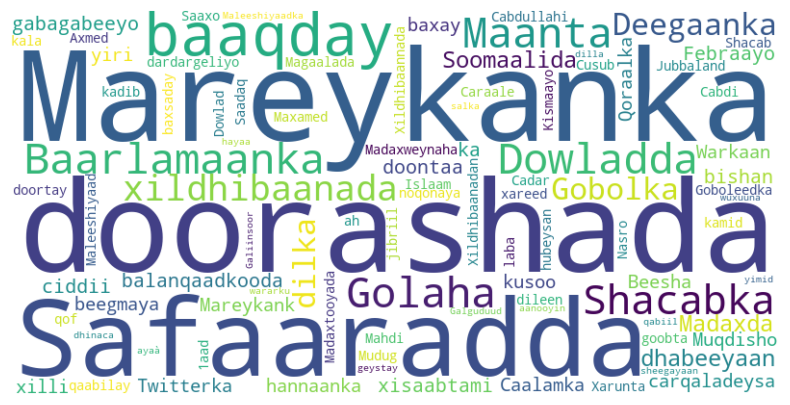

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'cleaned_texts' is your list of cleaned paragraphs
combined_text = " ".join(cleaned_texts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


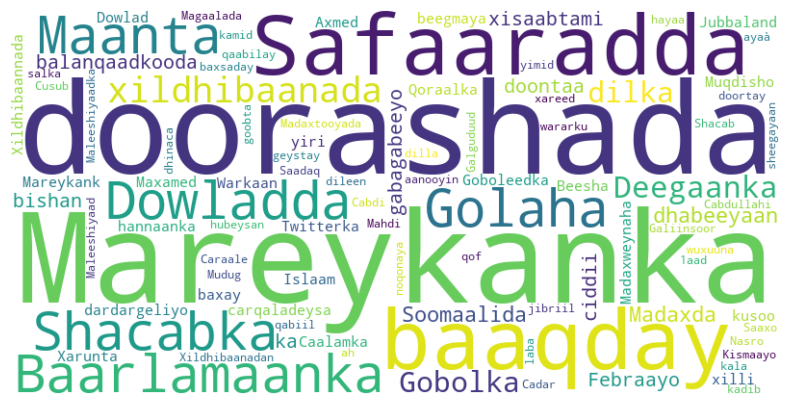

In [34]:
# Attempt to regenerate the word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(combined_text)

# Display the word cloud using matplotlib again
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


-----------------------------------------------

# Step saven : Exploratory Data Analysis (EDA) 

-------------------

## Data Visualization

### visulazing word counts and most common words

In [35]:
# Load the data and stop words, and perform text preprocessing (removing stop words and punctuation)

# Load the dataset and stop words
with open('data/Mini data.txt', 'r', encoding='utf-8') as file:
    data_text = file.read()

with open('data/Somali_Stop_Words.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().split(', ')

# Remove punctuation
import string
data_text_clean = data_text.translate(str.maketrans('', '', string.punctuation))

# Remove stop words
data_text_clean = ' '.join([word for word in data_text_clean.split() if word.lower() not in stop_words])

data_text_clean


'Safaaradda Mareykanka baaqday Madaxda Soomaalida dhabeeyaan balanqaadkooda doorashada Baarlamaanka gabagabeeyo 25ka bishan Febraayo“Dowladda Mareykanka xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa yiri Qoraalka Twitterka Safaaradda Mareykank MuqdishoWarkaan baxay Dowladda Mareykanka kusoo beegmaya xilli Beesha Caalamka Maanta baaqday dardargeliye doorashada Xildhibaannada Golaha SjacabkaHeshiiskii doorashada Muqdisho gaareen Golaha wadatashiga dhigayay 25 Bishaan gebagabeeyo doorashada Golaha Shacabka kala bar doortay Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam Xarunta Madaxtooyada qaabilay xildhibaanada Cusub maanta doortay Magaalada KismaayoXildhibaanadan kala Nasro Mahdi Caraale Saadaq Cabdullahi Cabdi Cadar xareed jibriil kamid noqonaya Xildhibaanada golaha shacabka Baarlamaanka 1aadMadaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam Xildhibaannada dardaarmay dhab Shaqeeyaan Shacabka matalaan Maleeshiyaad hubeysan laba qof Shacab dil

Total number of paragraphs: 1
Total number of characters: 1475


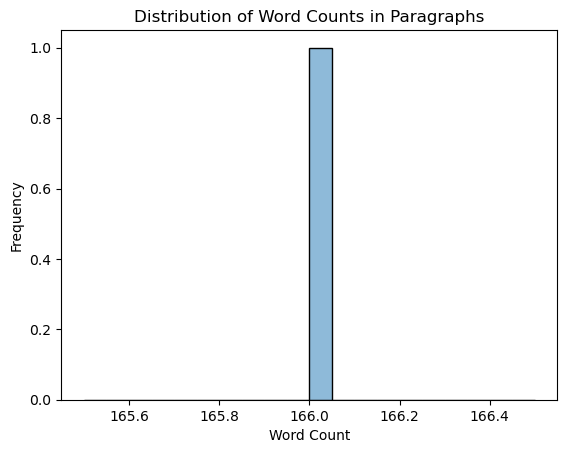

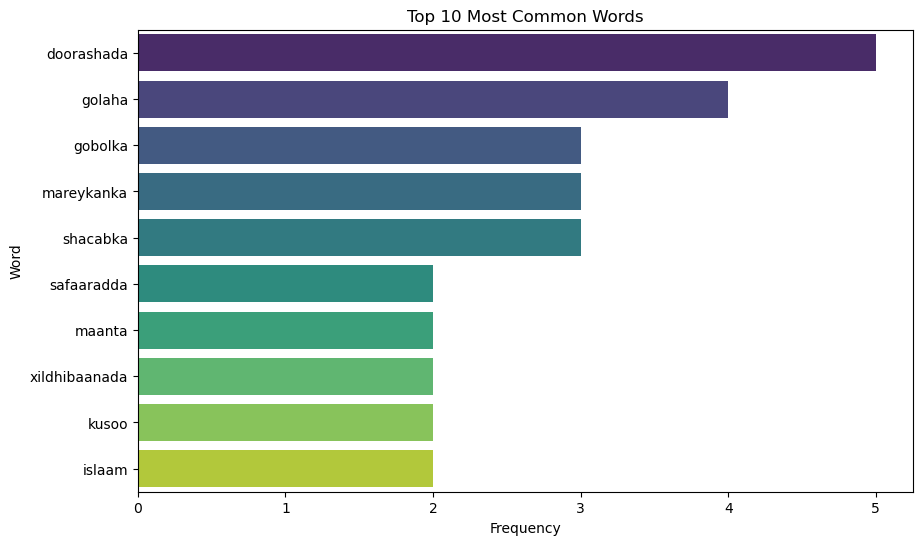

In [36]:
class TextDataAnalysis:
    def __init__(self, content):
        self.content = content
        self.paragraphs = self.content.split('\n\n')  # Split content into paragraphs

    def basic_stats(self):
        """Provides basic statistics about the text data."""
        total_paragraphs = len(self.paragraphs)
        total_characters = len(self.content)
        return total_paragraphs, total_characters

    def word_count_distribution(self):
        """Plots the distribution of word counts in paragraphs."""
        word_counts = [len(re.findall(r'\w+', para)) for para in self.paragraphs]
        sns.histplot(word_counts, bins=20, kde=True)
        plt.title('Distribution of Word Counts in Paragraphs')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        plt.show()

    def top_words(self, n=10):
        """Finds and plots the most common words in the text data."""
        words = re.findall(r'\w+', self.content.lower())
        word_counts = pd.Series(words).value_counts()
        top_n_words = word_counts.head(n)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_n_words.values, y=top_n_words.index, palette='viridis')
        plt.title(f'Top {n} Most Common Words')
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

    def explore(self):
        """Performs exploratory data analysis on the loaded text data."""
        total_paragraphs, total_characters = self.basic_stats()
        print("Total number of paragraphs:", total_paragraphs)
        print("Total number of characters:", total_characters)
        
        self.word_count_distribution()
        self.top_words()

# Create an instance of the modified class with cleaned data and perform EDA
text_analysis = TextDataAnalysis(data_text_clean)
text_analysis.explore()


-------------------------------------

### visulazing distribution paragraph lengths and unique words

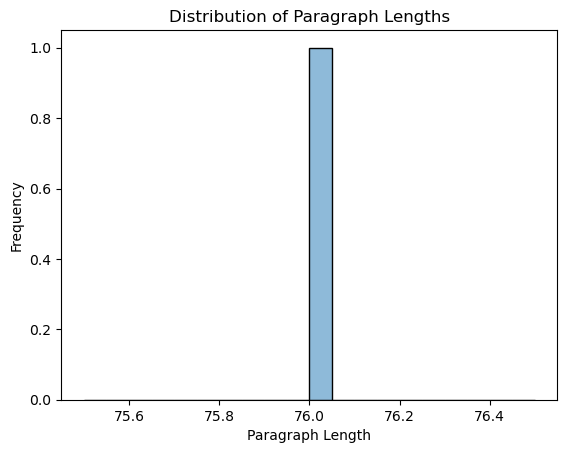

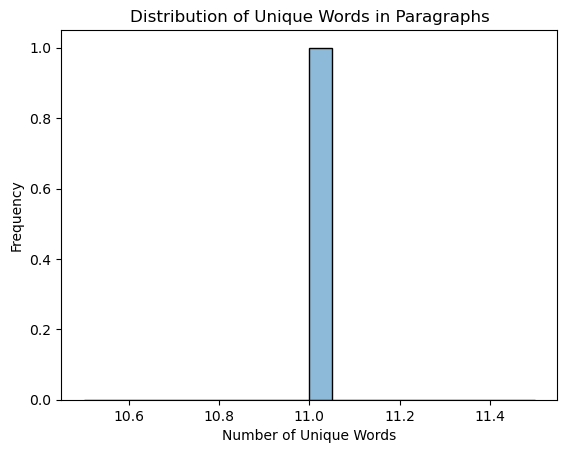

In [37]:
class TextDataAnalysis:
    def __init__(self, content):
        self.content = content
        self.paragraphs = self.content.split('\n\n')

    def paragraph_length_distribution(self):
        """Plots the distribution of paragraph lengths."""
        paragraph_lengths = [len(para) for para in self.paragraphs]
        sns.histplot(paragraph_lengths, bins=20, kde=True)
        plt.title('Distribution of Paragraph Lengths')
        plt.xlabel('Paragraph Length')
        plt.ylabel('Frequency')
        plt.show()

    def unique_word_distribution(self):
        """Plots the distribution of unique words in paragraphs."""
        unique_word_counts = [len(set(re.findall(r'\w+', para.lower()))) for para in self.paragraphs]
        sns.histplot(unique_word_counts, bins=20, kde=True)
        plt.title('Distribution of Unique Words in Paragraphs')
        plt.xlabel('Number of Unique Words')
        plt.ylabel('Frequency')
        plt.show()

    def explore(self):
        """Performs exploratory data analysis on the loaded text data."""
        self.paragraph_length_distribution()
        self.unique_word_distribution()

# Assuming data_text_clean is your cleaned text variable
data_text_clean = "The cleaned text data after processing stop words and punctuation removal..."
text_analysis = TextDataAnalysis(data_text_clean)
text_analysis.explore()

------------------------

## visulazing  the distribution of punctuation marks in paragraphs

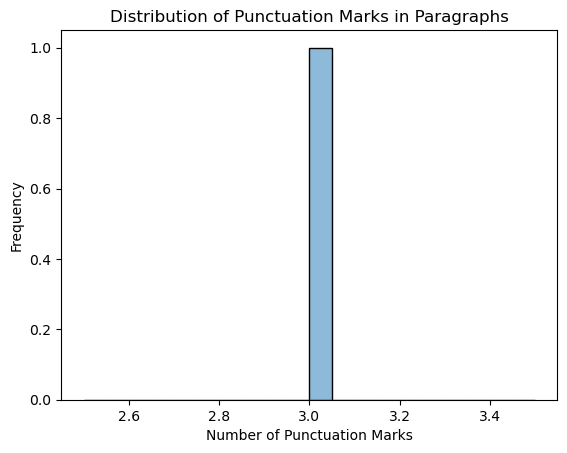

In [38]:
class TextDataAnalysis:
    def __init__(self, content):
        self.content = content
        self.paragraphs = self.content.split('\n\n')

    def punctuation_distribution(self):
        """Plots the distribution of punctuation marks in paragraphs."""
        punctuation_counts = []
        punctuation_marks = r'[^\w\s]'  # Regex for finding punctuation
        for para in self.paragraphs:
            punctuation_count = len(re.findall(punctuation_marks, para))
            punctuation_counts.append(punctuation_count)

        sns.histplot(punctuation_counts, bins=20, kde=True)
        plt.title('Distribution of Punctuation Marks in Paragraphs')
        plt.xlabel('Number of Punctuation Marks')
        plt.ylabel('Frequency')
        plt.show()

    def explore(self):
        """Performs exploratory data analysis on the loaded text data."""
        self.punctuation_distribution()

# Assuming data_text_clean is your cleaned text variable
data_text_clean = "The cleaned text data after processing stop words and punctuation removal..."
text_analysis = TextDataAnalysis(data_text_clean)
text_analysis.explore()


-------------------------

## Visulization Distribution of Word Counts in Paragraphs 

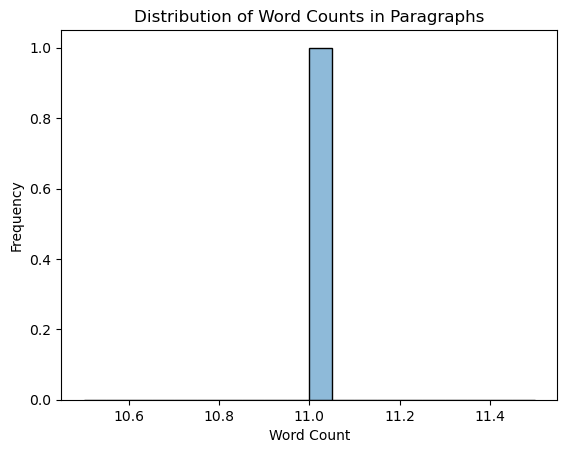

In [39]:
class TextDataAnalysis:
    def __init__(self, content):
        self.content = content
        self.paragraphs = self.content.split('\n\n')

    def word_count_distribution(self):
        """Plots the distribution of word counts in paragraphs."""
        word_counts = [len(re.findall(r'\w+', para)) for para in self.paragraphs]
        sns.histplot(word_counts, bins=20, kde=True)
        plt.title('Distribution of Word Counts in Paragraphs')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')
        plt.show()

    def explore(self):
        """Performs exploratory data analysis on the loaded text data."""
        self.word_count_distribution()

# Assuming data_text_clean is your cleaned text variable
data_text_clean = "The cleaned text data after processing stop words and punctuation removal..."
text_analysis = TextDataAnalysis(data_text_clean)
text_analysis.explore()

-------------

## Visualizing the average length of paragraphs in terms of character count and word count.

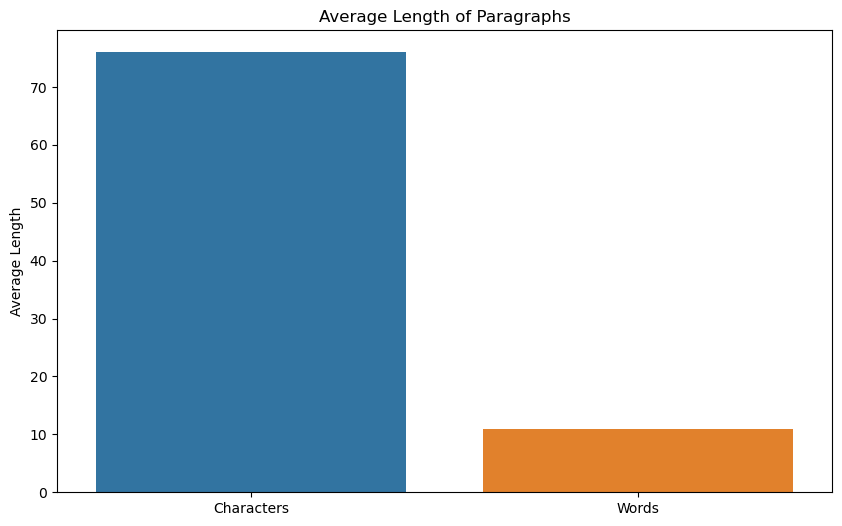

In [40]:
class TextDataAnalysis:
    def __init__(self, content):
        self.paragraphs = content.split('\n\n')

    def average_paragraph_length_characters(self):
        """Calculates the average length of paragraphs in terms of character count."""
        total_characters = sum(len(paragraph) for paragraph in self.paragraphs)
        average_length = total_characters / len(self.paragraphs) if self.paragraphs else 0
        return average_length

    def average_paragraph_length_words(self):
        """Calculates the average length of paragraphs in terms of word count."""
        total_words = sum(len(re.findall(r'\w+', paragraph)) for paragraph in self.paragraphs)
        average_length = total_words / len(self.paragraphs) if self.paragraphs else 0
        return average_length

    def visualize_average_paragraph_length(self):
        """Visualizes the average length of paragraphs in terms of character count and word count."""
        avg_length_characters = self.average_paragraph_length_characters()
        avg_length_words = self.average_paragraph_length_words()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=['Characters', 'Words'], y=[avg_length_characters, avg_length_words])
        plt.title('Average Length of Paragraphs')
        plt.ylabel('Average Length')
        plt.show()

    def explore(self):
        """Performs exploratory data analysis on the loaded text data."""
        self.visualize_average_paragraph_length()

# Assuming data_text_clean is your cleaned text variable
data_text_clean = "The cleaned text data after processing stop words and punctuation removal..."
text_analysis = TextDataAnalysis(data_text_clean)
text_analysis.explore()

----------------------------

## Visualizing the percentage of whitespace in the text data

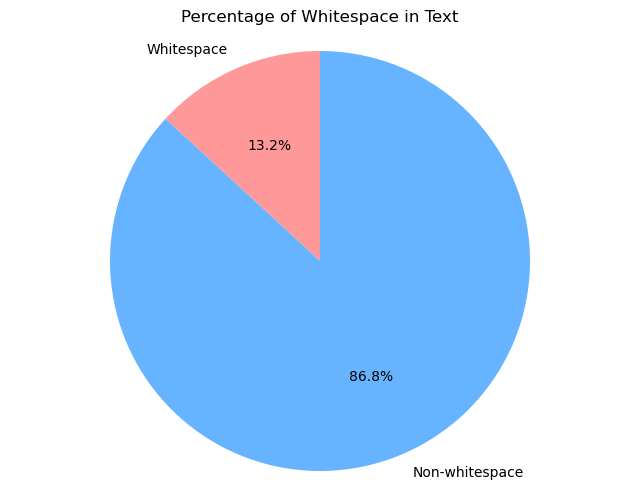

In [41]:
import matplotlib.pyplot as plt

class TextDataAnalysis:
    def __init__(self, content):
        self.content = content

    def calculate_whitespace_percentage(self):
        """Calculates the percentage of whitespace in the text data."""
        total_characters = len(self.content)
        whitespace_count = sum(1 for char in self.content if char.isspace())
        whitespace_percentage = (whitespace_count / total_characters) * 100 if total_characters > 0 else 0
        return whitespace_percentage

    def visualize_whitespace_percentage(self):
        """Visualizes the percentage of whitespace in the text data."""
        whitespace_percentage = self.calculate_whitespace_percentage()

        # Create labels for the pie chart
        labels = ['Whitespace', 'Non-whitespace']
        sizes = [whitespace_percentage, 100 - whitespace_percentage]
        colors = ['#ff9999', '#66b3ff']

        # Plot the pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Percentage of Whitespace in Text')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

    def explore(self):
        """Performs exploratory data analysis on the loaded text data."""
        self.visualize_whitespace_percentage()

# Assuming data_text_clean is your cleaned text variable
data_text_clean = "The cleaned text data after processing stop words and punctuation removal..."
text_analysis = TextDataAnalysis(data_text_clean)
text_analysis.explore()

----------------------

# Step eight : Encoding of data

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the dataset and stop words from the uploaded files
file_path_data = 'data/Mini data.txt'
file_path_stop_words = 'data/Somali_Stop_Words.txt'

# Read the data
with open(file_path_data, 'r', encoding='utf-8') as file:
    documents = file.readlines()

# Read the Somali stop words
with open(file_path_stop_words, 'r', encoding='utf-8') as file:
    stop_words = file.read().split(',')

# Initialize the TF-IDF Vectorizer, removing Somali stop words
vectorizer = TfidfVectorizer(stop_words=stop_words, strip_accents='unicode')

# Apply TF-IDF transformation to the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Create a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=[f'Document {i+1}' for i in range(len(documents))])

tfidf_df.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aan', 'aanu', 'adiga', 'adigoo', 'ah', 'aha', 'ahaa', 'ahaayeen', 'ahay', 'ahayn', 'albaabkii', 'ama', 'anigoo', 'annaga', 'atabo', 'ay', 'ayaa', 'ayaan', 'ayaanu', 'ayada', 'ayee', 'ayuu', 'baa', 'baan', 'badan', 'balse', 'been', 'buu', 'dadka', 'demin', 'dhamaan', 'dhan', 'dhaxeeya', 'dheeraad', 'dhowr', 'dib', 'dibadda', 'doonaa', 'ee', 'goorta', 'gudaha', 'hadana', 'haddii', 'hadii', 'hal', 'halkaas', 'halkan', 'haysta', 'haystaa', 'haysto', 'hoos', 'hor', 'ilaa', 'in', 'inay', 'inta', 'inuu', 'isaga', 'isagoo', 'isku', 'iyada', 'iyadoo', 'iyaga', 'iyagoo', 'iyo', 'jiray', 'jirtay', 'ka', 'kaa', 'kaaga', 'kaas', 'kahor', 'kale', 'kaliya', 'kama', 'kan', 'karo', 'kasoo', 'kasta', 'kastaa', 'kay', 'kayga', 'keeda', 'keedu', 'keeni', 'keliya', 'keyrkayaga', 'kheyrkayaga', 'kiisa', 'kor'

,1aad,25,aanooyin,aanooyinka,ah,ahaa,axmed,ay,ayaa,aysan,...,xareed,xarunta,xildhibaanada,xildhibaanadan,xildhibaannada,xilli,xiriira,xisaabtami,yimid,yiri
Document 1,0.000000,0.164966,0.0,0.0,0.000000,0.068468,0.000000,0.117048,0.234096,0.0,...,0.000000,0.000000,0.000000,0.000000,0.068468,0.082483,0.0,0.082483,0.0,0.082483
Document 2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
Document 3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
Document 4,0.112722,0.000000,0.0,0.0,0.225444,0.000000,0.225444,0.079980,0.239939,0.0,...,0.112722,0.112722,0.225444,0.112722,0.093569,0.000000,0.0,0.000000,0.0,0.000000
Document 5,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [43]:
# Load the newly uploaded dataset from the file
file_path_new_data = 'data/Mini data.txt'

# Read the new data
with open(file_path_new_data, 'r', encoding='utf-8') as file:
    new_documents = file.readlines()

# Apply TF-IDF transformation to the new documents using the existing vectorizer
new_tfidf_matrix = vectorizer.transform(new_documents)

# Create a DataFrame for better visualization of the new data
new_tfidf_df = pd.DataFrame(new_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=[f'Document {i+1}' for i in range(len(new_documents))])

new_tfidf_df.head()

,1aad,25,aanooyin,aanooyinka,ah,ahaa,axmed,ay,ayaa,aysan,...,xareed,xarunta,xildhibaanada,xildhibaanadan,xildhibaannada,xilli,xiriira,xisaabtami,yimid,yiri
Document 1,0.000000,0.164966,0.0,0.0,0.000000,0.068468,0.000000,0.117048,0.234096,0.0,...,0.000000,0.000000,0.000000,0.000000,0.068468,0.082483,0.0,0.082483,0.0,0.082483
Document 2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
Document 3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
Document 4,0.112722,0.000000,0.0,0.0,0.225444,0.000000,0.225444,0.079980,0.239939,0.0,...,0.112722,0.112722,0.225444,0.112722,0.093569,0.000000,0.0,0.000000,0.0,0.000000
Document 5,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


# Step nine : Model training 

## Word Embeddings

In [44]:
# Let's load the provided text data to preprocess and train a Word2Vec model
file_path = 'data/Mini data.txt'

# Read the file content
with open(file_path, 'r', encoding='utf-8') as file:
    documents = file.readlines()

documents[:5]  # Display the first few lines to get a sense of the data.


['"Safaaradda Mareykanka ayaa mar kale ugu baaqday Madaxda Soomaalida inay ka dhabeeyaan balanqaadkooda ahaa in doorashada Baarlamaanka lagu soo gabagabeeyo 25-ka bishan Febraayo.“Dowladda Mareykanka waxay la xisaabtami doontaa ciddii carqaladeysa hannaanka doorashada”ayaa lagu yiri Qoraalka Twitterka ee Safaaradda Mareykank ee Muqdisho.Warkaan kasoo baxay Dowladda Mareykanka ayaa kusoo beegmaya xilli Beesha Caalamka Maanta ay ku baaqday in la dardargeliye doorashada Xildhibaannada Golaha Sjacabka.Heshiiskii doorashada ay Muqdisho ku gaareen Golaha wadatashiga ayaa dhigayay in 25 Bishaan la soo geba-gabeeyo doorashada Golaha Shacabka, balse kala bar kaliya la doortay."\n',
 '\n',
 '    \n',
 '"Madaxweynaha Dowlad Goboleedka Jubbaland Axmed Maxamed Islaam, ayaa Xarunta Madaxtooyada ku qaabilay xildhibaanada Cusub ee maanta lagu doortay Magaalada Kismaayo.Xildhibaanadan oo kala ah, Nasro Mahdi Caraale, Saadaq Cabdullahi Cabdi, iyo Cadar xareed jibriil ayaa kamid noqonaya Xildhibaanada go

In [45]:
from nltk.tokenize import word_tokenize
import nltk
import string
from gensim.models import Word2Vec

nltk.download('punkt')

# Function to preprocess and clean the text data
def preprocess_text(text):
    # Tokenize and convert to lower case
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped_tokens = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped_tokens if word.isalpha()]
    return words

# Preprocess each document
clean_documents = [preprocess_text(doc) for doc in documents if doc.strip()]

# Preview processed documents
clean_documents[:3]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KCT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['safaaradda',
  'mareykanka',
  'ayaa',
  'mar',
  'kale',
  'ugu',
  'baaqday',
  'madaxda',
  'soomaalida',
  'inay',
  'ka',
  'dhabeeyaan',
  'balanqaadkooda',
  'ahaa',
  'in',
  'doorashada',
  'baarlamaanka',
  'lagu',
  'soo',
  'gabagabeeyo',
  'bishan',
  'febraayo',
  'dowladda',
  'mareykanka',
  'waxay',
  'la',
  'xisaabtami',
  'doontaa',
  'ciddii',
  'carqaladeysa',
  'hannaanka',
  'doorashada',
  'ayaa',
  'lagu',
  'yiri',
  'qoraalka',
  'twitterka',
  'ee',
  'safaaradda',
  'mareykank',
  'ee',
  'muqdishowarkaan',
  'kasoo',
  'baxay',
  'dowladda',
  'mareykanka',
  'ayaa',
  'kusoo',
  'beegmaya',
  'xilli',
  'beesha',
  'caalamka',
  'maanta',
  'ay',
  'ku',
  'baaqday',
  'in',
  'la',
  'dardargeliye',
  'doorashada',
  'xildhibaannada',
  'golaha',
  'sjacabkaheshiiskii',
  'doorashada',
  'ay',
  'muqdisho',
  'ku',
  'gaareen',
  'golaha',
  'wadatashiga',
  'ayaa',
  'dhigayay',
  'in',
  'bishaan',
  'la',
  'soo',
  'gebagabeeyo',
  'doorashada',


In [46]:
# Manual tokenization function to replace NLTK's tokenizer
def simple_tokenize(text):
    # Convert to lower case and split on whitespace
    tokens = text.lower().split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped_tokens = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens
    words = [word for word in stripped_tokens if word.isalpha()]
    return words

# Preprocess each document using the simple tokenization
clean_documents = [simple_tokenize(doc) for doc in documents if doc.strip()]

# Preview the cleaned documents
clean_documents[:3]


[['safaaradda',
  'mareykanka',
  'ayaa',
  'mar',
  'kale',
  'ugu',
  'baaqday',
  'madaxda',
  'soomaalida',
  'inay',
  'ka',
  'dhabeeyaan',
  'balanqaadkooda',
  'ahaa',
  'in',
  'doorashada',
  'baarlamaanka',
  'lagu',
  'soo',
  'gabagabeeyo',
  'bishan',
  'mareykanka',
  'waxay',
  'la',
  'xisaabtami',
  'doontaa',
  'ciddii',
  'carqaladeysa',
  'hannaanka',
  'lagu',
  'yiri',
  'qoraalka',
  'twitterka',
  'ee',
  'safaaradda',
  'mareykank',
  'ee',
  'muqdishowarkaan',
  'kasoo',
  'baxay',
  'dowladda',
  'mareykanka',
  'ayaa',
  'kusoo',
  'beegmaya',
  'xilli',
  'beesha',
  'caalamka',
  'maanta',
  'ay',
  'ku',
  'baaqday',
  'in',
  'la',
  'dardargeliye',
  'doorashada',
  'xildhibaannada',
  'golaha',
  'sjacabkaheshiiskii',
  'doorashada',
  'ay',
  'muqdisho',
  'ku',
  'gaareen',
  'golaha',
  'wadatashiga',
  'ayaa',
  'dhigayay',
  'in',
  'bishaan',
  'la',
  'soo',
  'gebagabeeyo',
  'doorashada',
  'golaha',
  'shacabka',
  'balse',
  'kala',
  'bar'

In [48]:
# Train a Word2Vec model using the clean documents
word2vec_model = Word2Vec(sentences=clean_documents, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
model_path = 'data/word2vec_somali_news.model'
word2vec_model.save(model_path)

# Example: Get the vector for a word and find similar words
word_vector = word2vec_model.wv['mareykanka']  # Get the vector for "mareykanka"
similar_words = word2vec_model.wv.most_similar('mareykanka')  # Find words similar to "mareykanka"

word_vector, similar_words


(array([-7.1898559e-03,  4.2508170e-03,  2.1574926e-03,  7.4357954e-03,
        -4.8905411e-03, -4.6142708e-03, -6.0445871e-03,  3.3750441e-03,
        -4.5377766e-03,  8.5139107e-03, -4.3279263e-03, -9.1805104e-03,
        -4.8186672e-03,  6.4201485e-03, -6.3674767e-03, -5.2462765e-03,
        -7.3254611e-03,  5.9609837e-03,  3.3393472e-03,  2.7820878e-03,
        -3.1083000e-03,  6.0855849e-03, -6.1767804e-03, -1.9846980e-03,
        -6.0002380e-03, -9.7126630e-04, -2.0305358e-03,  8.4615527e-03,
         4.9369344e-05, -8.5970098e-03, -5.4218196e-03, -6.8936259e-03,
         2.7264608e-03,  9.4289389e-03, -5.8591799e-03,  8.3216941e-03,
         8.5604750e-03, -7.0817592e-03, -8.8788960e-03,  9.4055319e-03,
         8.3813723e-03, -4.7103781e-03, -6.7655197e-03,  7.8364871e-03,
         3.8156328e-03,  8.1085376e-03, -7.5919158e-03, -9.5094685e-03,
         1.6271874e-03, -9.8069757e-03, -4.8711020e-03, -3.5026772e-03,
         9.6436003e-03,  8.6031454e-03, -2.8365478e-03,  5.84105

## FastText Model Training

### Install the Required Library

In [49]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.18.5 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for simpful==2.12.0 from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'do

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.


### Train the FastText Model

In [50]:
from gensim.models import FastText

# Assume 'clean_documents' is a list of lists of words, from your previous preprocessing steps
fasttext_model = FastText(sentences=clean_documents, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
fasttext_model.save('data/fasttext_somali_news.model')



### Using the Model

In [51]:
# Get the vector for a word
word_vector = fasttext_model.wv['mareykanka']  # Example word

# Find words similar to "mareykanka"
similar_words = fasttext_model.wv.most_similar('mareykanka')
print(similar_words)


[('mareykank', 0.7808619141578674), ('madaxda', 0.2786875367164612), ('xareed', 0.2781747579574585), ('dagaalada', 0.23396289348602295), ('iyada', 0.2339615672826767), ('waxaabay', 0.22014258801937103), ('degaanka', 0.21603620052337646), ('waxaa', 0.21125401556491852), ('sida', 0.2015015333890915), ('xildhibaanada', 0.18639712035655975)]


## Download a Pre-trained GloVe Model

## Load the GloVe Model

In [66]:
import numpy as np

def load_glove_model(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as file:
        word_to_vec_map = {}
        for line in file:
            line = line.strip().split()
            curr_word = line[0]
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    return word_to_vec_map


In [67]:
import numpy as np

def load_glove_model(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as file:
        word_to_vec_map = {}
        dimensions = None
        for line in file:
            line = line.strip().split()
            curr_word = line[0]
            vector_components = np.array(line[1:], dtype=np.float64)
            if dimensions is None:
                dimensions = len(vector_components)
            else:
                assert dimensions == len(vector_components), "Inconsistent vector dimensions"
            word_to_vec_map[curr_word] = vector_components
    return word_to_vec_map, dimensions


In [60]:
from nltk.tokenize import word_tokenize
import string

def preprocess_document(doc):
    """Tokenizes and removes punctuation from a document."""
    tokens = word_tokenize(doc.lower())
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in tokens if w.isalpha()]
    return words

documents_clean = [preprocess_document(doc) for doc in documents]


In [70]:
glove_vectors, dimensions = load_glove_model('data/glove.6B/glove.6B.300d.txt')
print("GloVe vector dimensions:", dimensions)


GloVe vector dimensions: 300


In [73]:
def document_vector(doc, word_to_vec_map, dimensions):
    """Computes the average vector for a document based on GloVe word vectors."""
    words = preprocess_document(doc)
    word_vectors = [word_to_vec_map[word] for word in words if word in word_to_vec_map]
    if len(word_vectors) == 0:
        return np.zeros(dimensions)  # Use dimensions to determine the size of zero vector
    else:
        return np.mean(np.array(word_vectors), axis=0)


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you want to compare the first document with all others
similarity_scores = cosine_similarity([doc_vectors[0]], doc_vectors[1:])
print(similarity_scores)


[[0.         0.         0.75924266 0.         0.         0.77944063]]
